<a href="https://colab.research.google.com/github/debayant9/Computer_Vision/blob/main/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*### **Training a Simple CNN on the MNIST Dataset - Handwrittent Digits**


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1224749426827706407
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2187913679853154439
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_train[5])
print(x_test[1].shape)


(60000, 28, 28)
(60000,)
2
(28, 28)


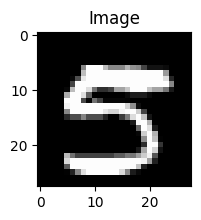

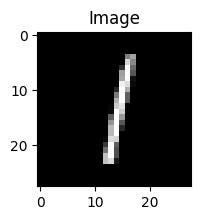

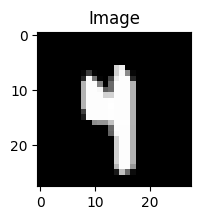

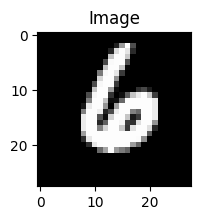

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image=None, size = 6):
  if image.any():
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
  else:
    plt.figure(figsize=(size, size))


for i in range(1,5):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  imshow("Image", img, size=2)






Data Preprocessing

In [ ]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

#reshape
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# One Hot Encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)


(60000, 10)


In [ ]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
print(y_test.shape[1])

10


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# **Building the model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


# **Training the model**

In [ ]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train, batch_size = batch_size,
                    epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8483 - loss: 0.5850 - val_accuracy: 0.8831 - val_loss: 0.4373
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8779 - loss: 0.4377 - val_accuracy: 0.8984 - val_loss: 0.3723
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8926 - loss: 0.3787 - val_accuracy: 0.9070 - val_loss: 0.3397
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9013 - loss: 0.3497 - val_accuracy: 0.9113 - val_loss: 0.3183
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9066 - loss: 0.3261 - val_accuracy: 0.9161 - val_loss: 0.3013
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9104 - loss: 0.3103 - val_accuracy: 0.9184 - val_loss: 0.2874
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9147 - loss: 0.2973 - val_accuracy: 0.9201 - val_loss: 0.2776
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9171 - loss: 0.2866 - val_accuracy: 0.

Plotting loss and accuracy charts

In [ ]:
history_dict = history.history
history_dict

{'accuracy': [0.8584666848182678,
  0.8829833269119263,
  0.8945833444595337,
  0.9011499881744385,
  0.9065499901771545,
  0.911050021648407,
  0.914733350276947,
  0.9174500107765198,
  0.9200166463851929,
  0.9226333498954773,
  0.925599992275238,
  0.9276999831199646,
  0.9301666617393494,
  0.9322166442871094,
  0.9344000220298767,
  0.9363333582878113,
  0.9382333159446716,
  0.9402166604995728,
  0.9419500231742859,
  0.9436833262443542],
 'loss': [0.5350069999694824,
  0.42069628834724426,
  0.37237730622291565,
  0.3445361852645874,
  0.3249817192554474,
  0.3097068965435028,
  0.29720503091812134,
  0.2860271632671356,
  0.2760052978992462,
  0.2667517066001892,
  0.25778624415397644,
  0.24958139657974243,
  0.2416359931230545,
  0.23412451148033142,
  0.22719112038612366,
  0.2204609364271164,
  0.21387124061584473,
  0.20761266350746155,
  0.20193219184875488,
  0.19628547132015228],
 'val_accuracy': [0.8830999732017517,
  0.8984000086784363,
  0.9070000052452087,
  0.9113

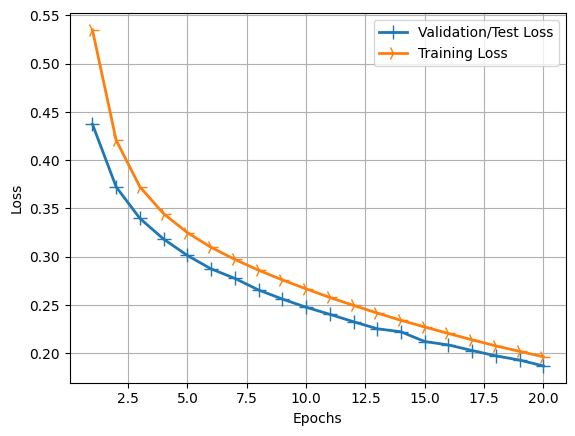

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

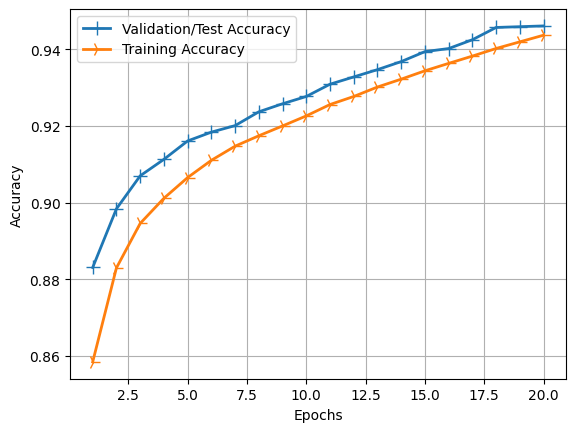

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.save("mnist_sample.keras")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("mnist_sample.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
#x_test = x_test.reshape(10000,28,28,1)
print(x_test.shape)

print("Predicting classes for all 10,000 test images...")

pred = np.argmax(model.predict(x_test), axis=-1)
print("Completed.\n")

print(pred)
print(type(pred))
print(len(pred))

(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Completed.

[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000


In [ ]:
# Get the first image by index 0 of x_test and show it's shape
input_im = x_test[0]
print(input_im.shape)

# We need to add a 4th dimension to the first axis
input_im = input_im.reshape(1,28,28,1)
print(input_im.shape)

# We now get the predictions for that single image
pred = np.argmax(model.predict(input_im), axis=-1)
print(pred)
print(type(pred))
print(len(pred))

(28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
[7]
<class 'numpy.ndarray'>
1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


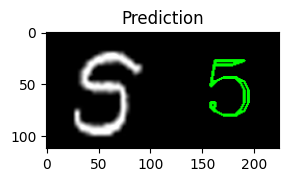

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


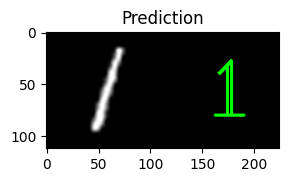

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


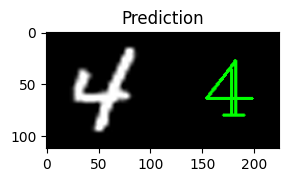

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


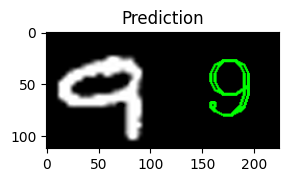

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


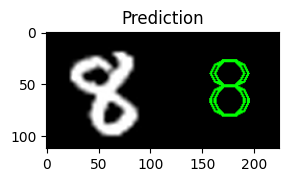

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


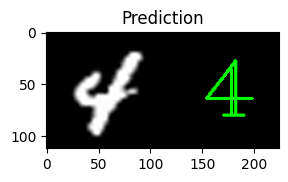

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


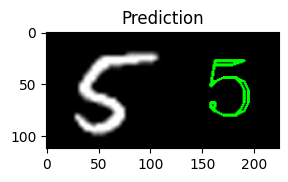

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


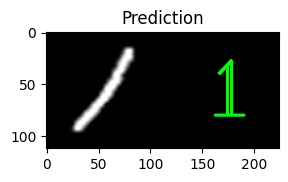

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


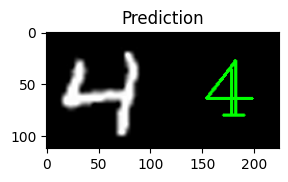

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


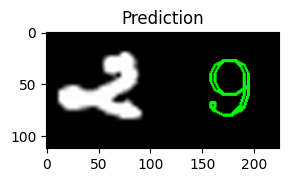

In [ ]:
import cv2
import numpy as np

# Reload our data since we rescaled it
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):
    '''Function that places the predicted class next to the original image'''
    # Create our black background
    BLACK = [0,0,0]
    # Expanded our original image to the right to create space to place our predicted class text
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    # convert our grayscale image to color
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # Put our predicted class text in our expanded image
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    # Get a random data image from our test dataset
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    # Create a larger re-sized image to hold our text and allow for a larger display
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    # Reshape our data so that we can input it (forward propagate) it to our network
    input_im = input_im.reshape(1,28,28,1)

    # Get Prediction, use [0] to access the value in the numpy array since it's stored as an array
    res = str(np.argmax(model.predict(input_im), axis=-1)[0])

    # Put the label on the image of our test data sample
    draw_test("Prediction", res,  np.uint8(imageL))